# Librerías y funciones a emplear

In [114]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import scipy as sp
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.patches import Polygon

In [216]:
plt.style.use("ggplot")
#Con conjunto de propiedades
# csfont = {'family':'serif','size':10,'weight' : 500}
# plt.rc("font",**csfont)

#Con propiedades uno a uno
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.size']=15
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rcParams["figure.figsize"]=[12,8]

#Para gráficas con un estilo especifico
# with plt.style.context('dark_background'):
#     plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')


# Datos de satélite

In [3]:
from os import scandir, getcwd
from os.path import abspath
from matplotlib import gridspec

class alfa:
    def __init__(self,ruta):  # Función constructora
        self.ruta=ruta 
    def carpetas(self):     #Inspector de carpetas
        self.folder=[abspath(arch.path) for arch in scandir(self.ruta) if arch.is_file()==False]
        self.D=[]
        for i in self.folder:
            d=i[61:]
            self.D.append(d)
        return self.folder,self.D
    def satelites(self):   #Inspector de archivos    
        self.Satellytes={}
        for k in range(0,len(self.carpetas()[0])):
            self.z= [abspath(arch.path) for arch in scandir(self.carpetas()[0][k]) if arch.is_file() and arch.path[-2:]=="nc"]
            self.Satellytes[self.carpetas()[1][k]]=self.z
        return self.Satellytes
    def graphics(self):
        self.graph={}
        self.Series={}
        for i in self.satelites().keys():
            print("\n","Satélite: ",i)
            self.plt=[]
            self.s=[]
            self.x_points=[-360+nc.Dataset(u).variables["LONGITUDE"][0] for u in self.satelites()[i]]
            self.y_points=[(nc.Dataset(u).variables["LATITUDE"][0]) for u in self.satelites()[i]]
            for u in self.satelites()[i]:
                print("\n",u,"\n")
                self.data=nc.Dataset(u)
                
                for k in self.data.variables:
                    try:
                        print([k,self.data.variables[k].units,self.data.variables[k].shape])
                    except:
                        print(k)
                        
                self.lon=self.data.variables["LONGITUDE"][:]
                self.lat=self.data.variables["LATITUDE"][:]
                try:
                    self.H=self.data.variables["SWH_KU"][:]
                except:
                    self.H=self.data.variables["SWH_KA"][:]
                self.time=self.data.variables["TIME"][:]
                self.da=[]
                self.x=-360+self.lon[0]
                self.y=self.lat[0]
                                   
                for w in range (0,len(self.time)):
                    self.date_utc=(datetime(1985,1,1)+timedelta(days=self.time[w]))
                    self.date_mod=self.date_utc-timedelta(hours=5) # Por estar un UTC
                    self.da.append(self.date_mod)
                    self.date=pd.DatetimeIndex(self.da)

                self.Hs=pd.Series(self.H,index=self.date)
                self.fig,self.ax=plt.subplots(2,1,figsize=(17,9))   
                self.ax11=self.ax[0]
                self.ax11.scatter(self.date,self.Hs)
                self.ax11.set_ylabel("$H_{s}$ [m]")
           
                self.ax12=self.ax[1]
                map=Basemap(llcrnrlat=1,urcrnrlat=5,llcrnrlon=-84,urcrnrlon=-76,
                            resolution='h',area_thresh=10000,ax=self.ax12)
                map.drawcoastlines()
                map.drawparallels(np.arange(1,6,1),labels=[1,0,0,0],size=11,linewidth=0.1)
                map.drawmeridians(np.arange(-76,-85,-1),labels=[0,1,0,1],size=11, linewidth=0.1)
                map.fillcontinents(color='tan',lake_color='lightblue')
                map.drawmapboundary(fill_color='lightblue')
                z=map.plot(self.x_points,self.y_points,'o',c='g')
                w=map.plot(self.x,self.y,'o',c='r')
                self.fig.suptitle("Altura de ola significante "+i)
                self.fig.savefig("Graficos\\Graficos satelitales para correlacion\\"+u[75:]+".png",dpi=300,bbox_inches="tight"
                                 ,pad_inches=0)
                self.plt.append(self.fig)
                self.s.append(self.Hs)
                print(self.x,self.y)
            self.graph[i]=self.plt
            self.Series[i]=self.s
        return self.graph,self.Series

In [4]:
d=alfa("C:\\Users\\ASUS\\Documents\\PAE\\Codigos\\Dataset\\Correlation Bouy")
resolutions=d.satelites()
graficador,seriador=d.graphics()[0],d.graphics()[1]
plt.close("all")


 Satélite:  0.05 degrees

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.05 degrees\IMOS_SRS-Surface-Waves_MW_GEOSAT_FV02_003N-282E-DM00.nc 

['TIME', 'days since 1985-01-01 00:00:00 UTC', (61,)]
['LATITUDE', 'degrees_north', (61,)]
['LONGITUDE', 'degrees_east', (61,)]
['BOT_DEPTH', 'm', (61,)]
['DIST2COAST', 'km', (61,)]
['SIG0_C', 'dB', (61,)]
SIG0_C_quality_control
['SIG0_C_num_obs', '1', (61,)]
['SIG0_C_std_dev', 'dB', (61,)]
['SIG0_KU', 'dB', (61,)]
SIG0_KU_quality_control
['SIG0_KU_num_obs', '1', (61,)]
['SIG0_KU_std_dev', 'dB', (61,)]
['SWH_C', 'm', (61,)]
SWH_C_quality_control
['SWH_C_num_obs', '1', (61,)]
['SWH_C_std_dev', 'm', (61,)]
['SWH_KU', 'm', (61,)]
['SWH_KU_CAL', 'm', (61,)]
SWH_KU_quality_control
['SWH_KU_num_obs', '1', (61,)]
['SWH_KU_std_dev', 'm', (61,)]
['UWND', 'm/s', (61,)]
['VWND', 'm/s', (61,)]
['WSPD', 'm/s', (61,)]
['WSPD_CAL', 'm/s', (61,)]


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


-77.90603637695312 3.812753

 Satélite:  0.1 degrees

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.1 degrees\IMOS_SRS-Surface-Waves_MW_ENVISAT_FV02_003N-282E-DM00.nc 

['TIME', 'days since 1985-01-01 00:00:00 UTC', (1012,)]
['LATITUDE', 'degrees_north', (1012,)]
['LONGITUDE', 'degrees_east', (1012,)]
['BOT_DEPTH', 'm', (1012,)]
['DIST2COAST', 'km', (1012,)]
['SIG0_C', 'dB', (1012,)]
SIG0_C_quality_control
['SIG0_C_num_obs', '1', (1012,)]
['SIG0_C_std_dev', 'dB', (1012,)]
['SIG0_KU', 'dB', (1012,)]
SIG0_KU_quality_control
['SIG0_KU_num_obs', '1', (1012,)]
['SIG0_KU_std_dev', 'dB', (1012,)]
['SWH_C', 'm', (1012,)]
SWH_C_quality_control
['SWH_C_num_obs', '1', (1012,)]
['SWH_C_std_dev', 'm', (1012,)]
['SWH_KU', 'm', (1012,)]
['SWH_KU_CAL', 'm', (1012,)]
SWH_KU_quality_control
['SWH_KU_num_obs', '1', (1012,)]
['SWH_KU_std_dev', 'm', (1012,)]
['UWND', 'm/s', (1012,)]
['VWND', 'm/s', (1012,)]
['WSPD', 'm/s', (1012,)]
['WSPD_CAL', 'm/s', (1012,)]
-77.51666259765625 3.421351


-77.96585083007812 3.678429

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.15 degrees\IMOS_SRS-Surface-Waves_MW_SARAL_FV02_003N-282E-DM00.nc 

['TIME', 'days since 1985-01-01 00:00:00 UTC', (1028,)]
['LATITUDE', 'degrees_north', (1028,)]
['LONGITUDE', 'degrees_east', (1028,)]
['BOT_DEPTH', 'm', (1028,)]
['DIST2COAST', 'km', (1028,)]
['SIG0_C', 'dB', (1028,)]
SIG0_C_quality_control
['SIG0_C_num_obs', '1', (1028,)]
['SIG0_C_std_dev', 'dB', (1028,)]
['SIG0_KA', 'dB', (1028,)]
SIG0_KA_quality_control
['SIG0_KA_num_obs', '1', (1028,)]
['SIG0_KA_std_dev', 'dB', (1028,)]
['SWH_C', 'm', (1028,)]
SWH_C_quality_control
['SWH_C_num_obs', '1', (1028,)]
['SWH_C_std_dev', 'm', (1028,)]
['SWH_KA', 'm', (1028,)]
['SWH_KA_CAL', 'm', (1028,)]
SWH_KA_quality_control
['SWH_KA_num_obs', '1', (1028,)]
['SWH_KA_std_dev', 'm', (1028,)]
['UWND', 'm/s', (1028,)]
['VWND', 'm/s', (1028,)]
['WSPD', 'm/s', (1028,)]
['WSPD_CAL', 'm/s', (1028,)]
-77.48587036132812 3.3691585

 C:\Users\ASUS\Documents

-77.90603637695312 3.812753

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.15 degrees\IMOS_SRS-Surface-Waves_MW_HY-2_FV02_003N-282E-DM00.nc 

['TIME', 'days since 1985-01-01 00:00:00 UTC', (337,)]
['LATITUDE', 'degrees_north', (337,)]
['LONGITUDE', 'degrees_east', (337,)]
['BOT_DEPTH', 'm', (337,)]
['DIST2COAST', 'km', (337,)]
['SIG0_C', 'dB', (337,)]
SIG0_C_quality_control
['SIG0_C_num_obs', '1', (337,)]
['SIG0_C_std_dev', 'dB', (337,)]
['SIG0_KU', 'dB', (337,)]
SIG0_KU_quality_control
['SIG0_KU_num_obs', '1', (337,)]
['SIG0_KU_std_dev', 'dB', (337,)]
['SWH_C', 'm', (337,)]
SWH_C_quality_control
['SWH_C_num_obs', '1', (337,)]
['SWH_C_std_dev', 'm', (337,)]
['SWH_KU', 'm', (337,)]
['SWH_KU_CAL', 'm', (337,)]
SWH_KU_quality_control
['SWH_KU_num_obs', '1', (337,)]
['SWH_KU_std_dev', 'm', (337,)]
['UWND', 'm/s', (337,)]
['VWND', 'm/s', (337,)]
['WSPD', 'm/s', (337,)]
['WSPD_CAL', 'm/s', (337,)]
-77.20614624023438 3.763721

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Cor

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-77.38494873046875 3.587822

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.15 degrees\IMOS_SRS-Surface-Waves_MW_JASON-2_FV02_003N-282E-DM00.nc 

['TIME', 'days since 1985-01-01 00:00:00 UTC', (35,)]
['LATITUDE', 'degrees_north', (35,)]
['LONGITUDE', 'degrees_east', (35,)]
['BOT_DEPTH', 'm', (35,)]
['DIST2COAST', 'km', (35,)]
['SIG0_C', 'dB', (35,)]
SIG0_C_quality_control
['SIG0_C_num_obs', '1', (35,)]
['SIG0_C_std_dev', 'dB', (35,)]
['SIG0_KU', 'dB', (35,)]
SIG0_KU_quality_control
['SIG0_KU_num_obs', '1', (35,)]
['SIG0_KU_std_dev', 'dB', (35,)]
['SWH_C', 'm', (35,)]
SWH_C_quality_control
['SWH_C_num_obs', '1', (35,)]
['SWH_C_std_dev', 'm', (35,)]
['SWH_KU', 'm', (35,)]
['SWH_KU_CAL', 'm', (35,)]
SWH_KU_quality_control
['SWH_KU_num_obs', '1', (35,)]
['SWH_KU_std_dev', 'm', (35,)]
['UWND', 'm/s', (35,)]
['VWND', 'm/s', (35,)]
['WSPD', 'm/s', (35,)]
['WSPD_CAL', 'm/s', (35,)]
-77.96585083007812 3.678429

 C:\Users\ASUS\Documents\PAE\Codigos\Dataset\Correlation Bouy\0.15 

Se elige la única serie de datos satelitales que está dentro de la franja de medición requerida

In [5]:
sat_2009=seriador["0.1 degrees"][0]["2009-01-01 01:00:00":"2010-01-01 00:00:00"]

# Datos de boya

In [6]:
dataset_2008=pd.read_excel(".\Dataset\Bouys Data\Bouys Data.xlsx",sheet_name="2008")
dataset_2009=pd.read_excel(".\Dataset\Bouys Data\Bouys Data.xlsx",sheet_name="2009")
dataset_2010=pd.read_excel(".\Dataset\Bouys Data\Bouys Data.xlsx",sheet_name="2010")

In [49]:
Dataset=[dataset_2008,dataset_2009,dataset_2010]
Dat=[]
SWH=[]
MWP=[]
for i in Dataset:
    dat=[datetime(i.YY[k],i.MM[k],i.DD[k],i.hh[k],i.mm[k]) for k in range(1,len(i)) if float(i.WVHT[k])<50]
    swh=[float(i.WVHT[k]) for k in range(1,len(i)) if float(i.WVHT[k])<50]
    mwp=[float(i.DPD[k]) for k in range(1,len(i)) if float(i.DPD[k])<50]
    MWP.append(mwp)
    SWH.append(swh)
    Dat.append(dat)
    
Series=[pd.Series(k,index=i) for i,k in zip(Dat,SWH)]
Series2=[pd.Series(k,index=i) for i,k in zip(Dat,MWP)]
bouy_2009=Series[1]
bouy_2009_2=Series2[1]

# Datos de reanálisis

Estarán los datos de ERA-Interim en UTC?

In [58]:
data_2009=nc.Dataset(".\dataset\Real data\\2009.nc")

time_2009=data_2009.variables["time"][:]
lon_2009=data_2009.variables["longitude"][:]
lat_2009=data_2009.variables["latitude"][:]
date_2009=pd.date_range("2009-01-01 00:00:00","2009-12-31 23:00:00",freq="H")
swh_2009=data_2009.variables["swh"][:,0,0]
mwp_2009=data_2009.variables["mwp"][:,0,0]

# print(data_2009.variables["swh"].shape)
# for i in data_2009.variables:
#     print(data_2009.variables[i])

In [55]:
reanalysis_2009=pd.Series(swh_2009,index=date_2009)
reanalysis_2009_2=pd.Series(mwp_2009,index=date_2009)

In [53]:
# for w in range (0,len(time)):
#     date_utc=(datetime(1900,1,1,0,0,0)+timedelta(hours=time[w]))
# #     date_mod=date_utc-timedelta(hours=5) # Por estar un UTC
#     da.append(date_utc)
#     date=pd.DatetimeIndex(da)

# Serie alrededor de boya

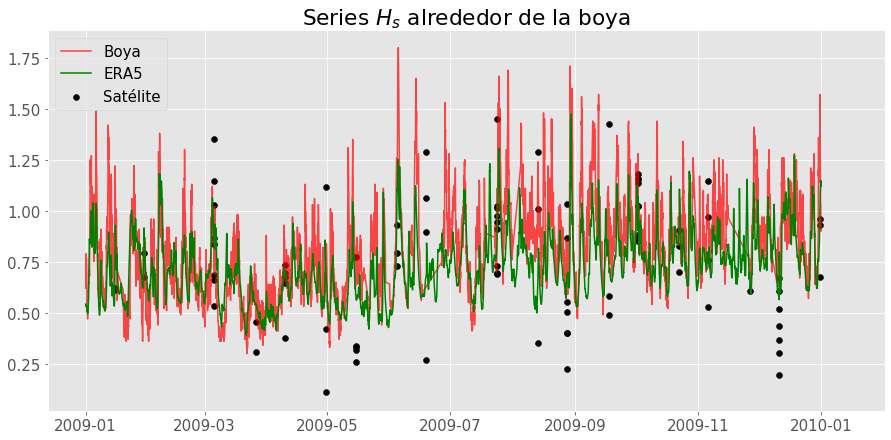

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(sat_2009.index,sat_2009,c='k',label="Satélite")
plt.plot(bouy_2009,c='r',alpha=0.7,label="Boya")
plt.plot(reanalysis_2009,c='g',label="ERA5")
plt.legend()
plt.title("Series $H_{s}$ alrededor de la boya")
plt.savefig("Series $H_{s}$ alrededor de la boya.png",dpi=300,bbox_inches="tight",pad_inches=0)

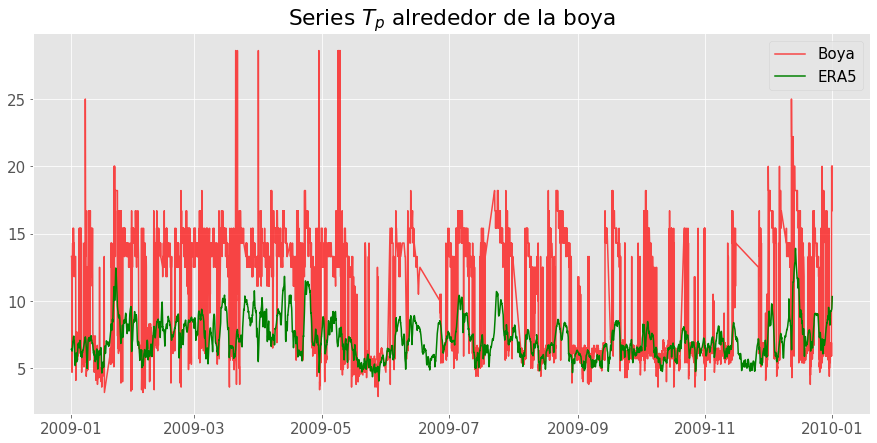

In [60]:
plt.figure(figsize=(15,7))
plt.plot(bouy_2009_2,c='r',alpha=0.7,label="Boya")
plt.plot(reanalysis_2009_2,c='g',label="ERA5")
plt.legend()
plt.title("Series $T_{p}$ alrededor de la boya")
plt.savefig("Series $T_{p}$ alrededor de la boya.png",dpi=300,bbox_inches="tight",pad_inches=0)

# Series reindexadas alrededor de la boya

Dado que los datos están a una resolución diferente, se reindexa la serie de datos de reanalisis a la misma resolución de los datos de la boya

In [61]:
rereanalysis_2009=reanalysis_2009.reindex(bouy_2009.index,method="nearest")
rereanalysis_2009_2=reanalysis_2009_2.reindex(bouy_2009_2.index,method="nearest")

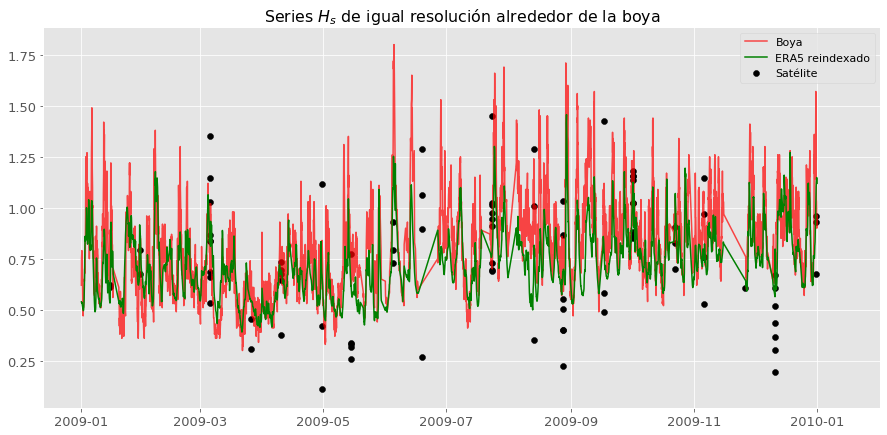

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(sat_2009.index,sat_2009,c='k',label="Satélite")
plt.plot(bouy_2009,c='r',alpha=0.7,label="Boya")
plt.plot(rereanalysis_2009,c='g',label="ERA5 reindexado")
plt.legend()
plt.title("Series $H_{s}$ de igual resolución alrededor de la boya")
plt.savefig("Series $H_{s}$ de igual resolución alrededor de la boya.png",dpi=300,bbox_inches="tight",pad_inches=0)

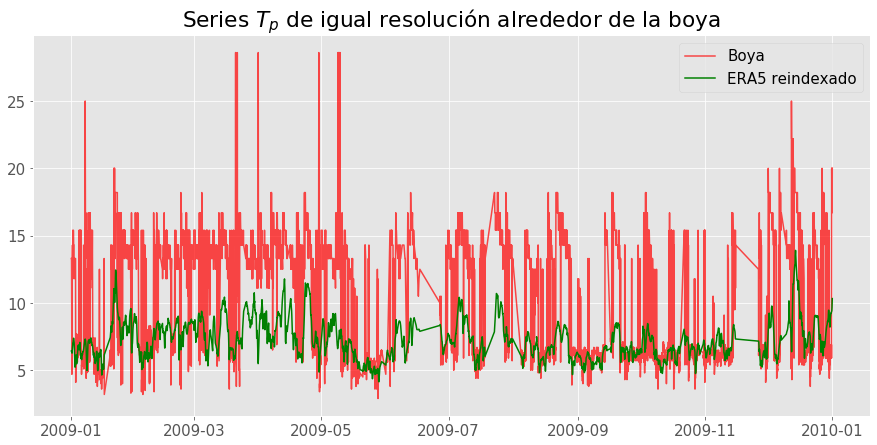

In [62]:
plt.figure(figsize=(15,7))
plt.plot(bouy_2009_2,c='r',alpha=0.7,label="Boya")
plt.plot(rereanalysis_2009_2,c='g',label="ERA5 reindexado")
plt.legend()
plt.title("Series $T_{p}$ de igual resolución alrededor de la boya")
plt.savefig("Series $T_{p}$ de igual resolución alrededor de la boya.png",dpi=300,bbox_inches="tight",pad_inches=0)

# Comparación estadística entre los datos existentes

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as sp

rms = sqrt(mean_squared_error(bouy_2009.values,rereanalysis_2009.values))
coef_pearson=sp.pearsonr(bouy_2009.values,rereanalysis_2009.values)[0]
print(rms,coef_pearson)

0.16965352705878586 0.7776863686806623


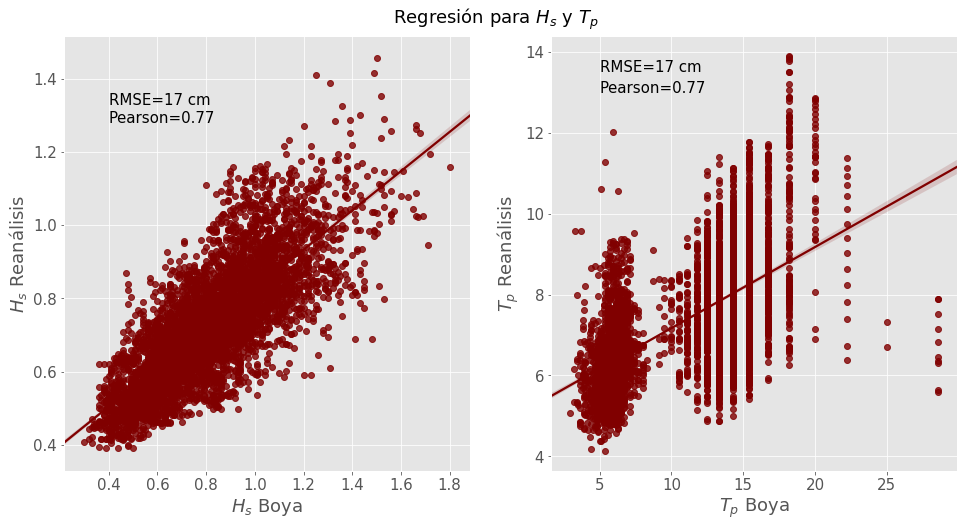

In [81]:
import seaborn as sns
fig,axs=plt.subplots(1,2,figsize=(16,8))
plt.suptitle("Regresión para $H_{s}$ y $T_{p}$",y=0.93)

ax1=axs[0]
sns.regplot(x=bouy_2009.values,y=rereanalysis_2009.values,color='maroon',ax=ax1)
ax1.annotate("RMSE=17 cm",(0.4,1.33))
ax1.annotate("Pearson=0.77",(0.4,1.28))
ax1.set_xlabel("$H_{s}$ Boya")
ax1.set_ylabel("$H_{s}$ Reanálisis")
# ax1.set_title("Regresión Boya-Reanálisis")

ax2=axs[1]
sns.regplot(x=bouy_2009_2.values,y=rereanalysis_2009_2.values,color='maroon',ax=ax2)
ax2.annotate("RMSE=17 cm",(5,13.5))
ax2.annotate("Pearson=0.77",(5,13))
ax2.set_xlabel("$T_{p}$ Boya")
ax2.set_ylabel("$T_{p}$ Reanálisis")
# ax2.set_title("Regresión Boya-Reanálisis")

plt.savefig("Graficos\\Regresion Boya-Reanalisis.png",dpi=300,bbox_inches="tight",pad_inches=0)

In [16]:
# import statsmodels.formula.api as smf
# import statsmodels.api as sm

# df_max=pd.DataFrame(index=rereanalysis_2009.index,columns=["Boya","Reanalisis"])
# df_max["Boya"]=bouy_2009.values
# df_max["Reanalisis"]=rereanalysis_2009.values
# est = smf.ols(formula='Reanalisis~Boya', data=df_max).fit()
# est.summary() # Employed se estima en base a GNP.

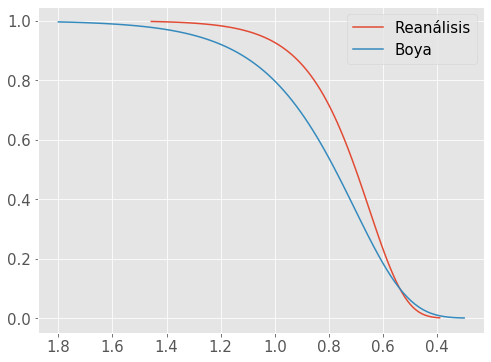

In [82]:
import scipy.stats as ss

param=ss.gumbel_r.fit(bouy_2009.values)
x=np.linspace(np.min(bouy_2009.values),np.max(bouy_2009.values),100)
pdf_gumbel=ss.gumbel_r.cdf(x,loc=param[0],scale=param[1])


param2=ss.gumbel_r.fit(rereanalysis_2009.values)
x2=np.linspace(np.min(rereanalysis_2009.values),np.max(rereanalysis_2009.values),100)
pdf_gumbel2=ss.gumbel_r.cdf(x2,loc=param2[0],scale=param2[1])
plt.figure(figsize=(8,6))
plt.plot(x2,pdf_gumbel2,label="Reanálisis")
plt.plot(x,pdf_gumbel,label="Boya")
plt.legend()
plt.gca().invert_xaxis()

In [18]:
# param_bouy=ss.gumbel_r.fit(bouy_2009.values)
# param_reanalysis=ss.gumbel_r.fit(rereanalysis_2009.values)

# pp_bouy = sm.ProbPlot(bouy_2009.values,dist="gumbel_r",fit=True)
# pp_reanalysis = sm.ProbPlot(rereanalysis_2009.values,dist="gumbel_r",fit=True)## para qué se usa fit=True?
                            
# fig,ax=plt.subplots(1,1,figsize=(8,6)) 
# kws={"markeredgecolor":'k',"fillstyle":'none'}
# axs=pp_bouy.qqplot("Datos de boyas","Datos de reanálisis",other=pp_reanalysis, line='45',ax=ax,**kws)

## QQplots para Hs

In [19]:
import numpy as np

P_bouys=[]
P_ERA5=[]
P_SAT=[]
for i in range(10,100,1):
    p_era = np.percentile(rereanalysis_2009.values-np.mean(rereanalysis_2009.values),i)
    p = np.percentile(bouy_2009.values-np.mean(bouy_2009.values),i)
    psat=np.percentile(sat_2009.values-np.mean(sat_2009.values),i)
    P_bouys.append(p)# return 50th percentile, e.g median
    P_ERA5.append(p_era)
    P_SAT.append(psat)

# m, b = np.polyfit(P_ERA5,P_bouys, 1)
poly1 = np.polyfit(P_bouys, P_ERA5, 1)
p1=np.poly1d(poly1)
d1=p1(P_bouys)

poly2=np.polyfit(P_bouys, P_SAT, 1)
p2=np.poly1d(poly2)
d2=p2(P_bouys)

poly3=np.polyfit(P_ERA5, P_SAT, 1)
p3=np.poly1d(poly3)
d3=p3(P_ERA5)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


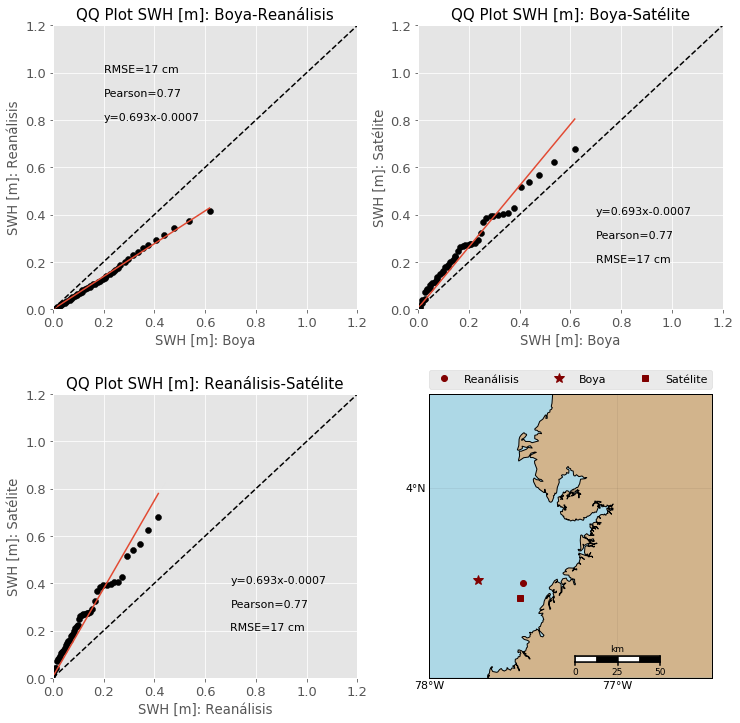

In [46]:
rmse = sqrt(mean_squared_error(P_bouys,d1))
pearson=sp.pearsonr(P_bouys,d1)[0]

fig,ax=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(hspace=0.3)

ax1=ax[0][0]
ax1.scatter(P_bouys,P_ERA5,c='k')
ax1.plot(P_bouys,d1)
ax1.plot([0,1.5],[0,1.5],'--',c='k')
ax1.set_title("QQ Plot SWH [m]: Boya-Reanálisis",fontsize=15)
ax1.set_xlabel("SWH [m]: Boya")
ax1.set_ylabel("SWH [m]: Reanálisis")
ax1.set_xlim(0,1.2)
ax1.set_ylim(0,1.2)
ax1.annotate("RMSE=17 cm",(0.2,1.))
ax1.annotate("Pearson=0.77",(0.2,0.9))
ax1.annotate("y=0.693x-0.0007",(0.2,0.8))

ax2=ax[0][1]
ax2.scatter(P_bouys,P_SAT,c='k')
ax2.plot(P_bouys,d2)
ax2.plot([0,1.5],[0,1.5],'--',c='k')
ax2.set_title("QQ Plot SWH [m]: Boya-Satélite",fontsize=15)
ax2.set_xlabel("SWH [m]: Boya")
ax2.set_ylabel("SWH [m]: Satélite")
ax2.set_xlim(0,1.2)
ax2.set_ylim(0,1.2)
ax2.annotate("RMSE=17 cm",(0.7,0.2))
ax2.annotate("Pearson=0.77",(0.7,0.3))
ax2.annotate("y=0.693x-0.0007",(0.7,0.4))

ax3=ax[1][0]
ax3.scatter(P_ERA5,P_SAT,c='k')
ax3.plot(P_ERA5,d3)
ax3.plot([0,1.5],[0,1.5],'--',c='k')
ax3.set_title("QQ Plot SWH [m]: Reanálisis-Satélite",fontsize=15)
ax3.set_xlabel("SWH [m]: Reanálisis")
ax3.set_ylabel("SWH [m]: Satélite")
ax3.set_xlim(0,1.2)
ax3.set_ylim(0,1.2)
ax3.annotate("RMSE=17 cm",(0.7,0.2))
ax3.annotate("Pearson=0.77",(0.7,0.3))
ax3.annotate("y=0.693x-0.0007",(0.7,0.4))

ax4=ax[1][1]

map_points=Basemap(llcrnrlat=3,urcrnrlat=4.5,llcrnrlon=-78,urcrnrlon=-76.5,projection="merc",
                            resolution='h',area_thresh=10000,ax=ax4)
map_points.drawcoastlines()
map_points.drawparallels(np.arange(3,5,1),labels=[1,0,0,0],size=11,linewidth=0.1)
map_points.drawmeridians(np.arange(-76,-79,-1),labels=[0,1,0,1],size=11, linewidth=0.1)
map_points.fillcontinents(color='tan',lake_color='lightblue')
map_points.drawmapboundary(fill_color='lightblue')
x_re, y_re = map_points(-77.5,3.5)
plt.plot(x_re,y_re,'o',c='maroon',label="Reanálisis")
x_buoy, y_buoy = map_points(-77.737,3.516)
plt.plot(x_buoy, y_buoy,'*',markersize=10,c='maroon',label="Boya")
x_sat,y_sat=map_points(-77.516,3.421351)
plt.plot(x_sat,y_sat,'s',c="maroon",label="Satélite")
map_points.drawmapscale(-77,3.1,0,0,50,barstyle="fancy")
ax4.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=3,mode="expand", borderaxespad=0.)

plt.savefig("Graficos\\QQplots.png",dpi=500,bbox_inches="tight",pad_inches=0)

## QQplots para Tp

In [83]:
import numpy as np

T_bouys=[]
T_ERA5=[]
for i in range(10,100,1):
    t_era = np.percentile(rereanalysis_2009_2.values-np.mean(rereanalysis_2009_2.values),i)
    t = np.percentile(bouy_2009_2.values-np.mean(bouy_2009_2.values),i)
    T_bouys.append(t)# return 50th percentile, e.g median
    T_ERA5.append(t_era)

# m, b = np.polyfit(P_ERA5,P_bouys, 1)
poly= np.polyfit(T_bouys,T_ERA5, 1)
p=np.poly1d(poly)
d=p(T_bouys)

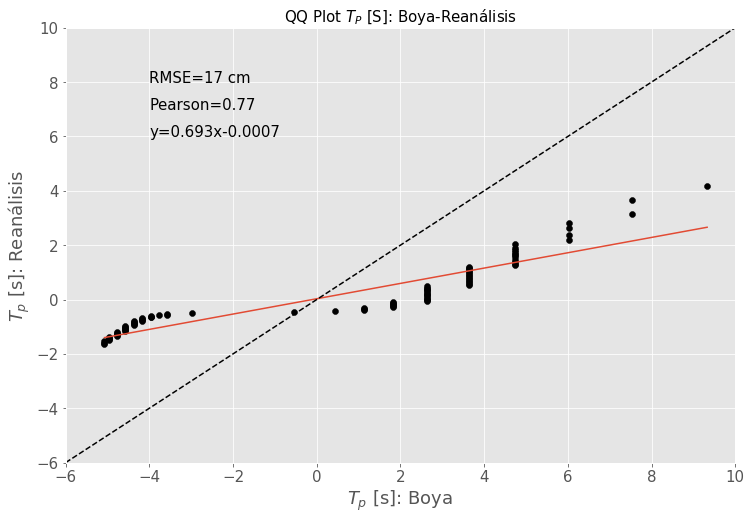

In [102]:
plt.scatter(T_bouys,T_ERA5,c='k')
plt.plot(T_bouys,d)
plt.plot([-6.,10],[-6.,10],'--',c='k')
plt.title("QQ Plot $T_{P}$ [S]: Boya-Reanálisis",fontsize=15)
plt.xlabel("$T_{p}$ [s]: Boya")
plt.ylabel("$T_{p}$ [s]: Reanálisis")
plt.xlim(-6,10)
plt.ylim(-6,10)
plt.annotate("RMSE=17 cm",(-4.,8))
plt.annotate("Pearson=0.77",(-4,7))
plt.annotate("y=0.693x-0.0007",(-4,6))
plt.savefig("Graficos\\QQplot_tp.png",dpi=500,bbox_inches="tight",pad_inches=0)

# Análisis de régimenes medios

In [124]:
años=["1979","1980","1981","1982","1983","1984","1985",'1986','1987',
            '1988','1989','1990',
            '1991','1992','1993',
            '1994','1995','1996',
            '1997','1998','1999',
            '2000','2001','2002',
            '2003','2004','2005',
            '2006','2007','2008',
            '2009','2010','2011',
            '2012','2013','2014',
            '2015','2016','2017',
            '2018']

da=[]
SWH,MWP,MWD=[],[],[]
for j,i in enumerate(años):
    test_data=nc.Dataset(".\Dataset\Real data\\"+i+".nc")
#     for k in test_data.variables: 
#         print([k,test_data.variables[k].units,test_data.variables[k].shape])
    time=test_data.variables["time"][:]
    lon=test_data.variables["longitude"][:]
    lat=test_data.variables["latitude"][:]
    swh=test_data.variables["swh"][:,0,0]
    mwd=test_data.variables["mwd"][:,0,0]
    mwp=test_data.variables["mwp"][:,0,0]
    
    # Se deben convertir los tiempos a hora local
    for w in range (0,len(time)):
        date_utc=(datetime(1900,1,1,0,0,0)+timedelta(hours=np.float(time[w])))
        date_mod=date_utc-timedelta(hours=5) # Por estar un UTC
        da.append(date_utc)
        SWH.append(swh[w])
        MWP.append(mwp[w])
        MWD.append(mwd[w])
        
date=pd.DatetimeIndex(da)

Se crea el DataFrame para hacer el ciclo anual

In [125]:
# test_date=pd.date_range("2009-07-28 00:00:00","2009-07-28 23:00:00",freq="H")
test_data2=pd.DataFrame(SWH,index=date,columns=["SWH"])
test_data2["MWP"]=MWP
test_data2["MWD"]=MWD
test_data2["Año"]=[i.year for i in test_data2.index]
test_data2["Mes"]=[i.month for i in test_data2.index]


# test_data2

# Variación estacional (Ciclo anual)

In [126]:
test_data2=test_data2.replace(np.nan,0)

meses_swh=test_data2.groupby(['Año','Mes'])['SWH']
meses_mwp=test_data2.groupby(['Año','Mes'])['MWP']
meses_mwd=test_data2.groupby(['Año','Mes'])['MWD']

In [127]:
df1=pd.DataFrame(index=np.arange(1979,2019,1), columns=("Ene","Feb","Mar","Abr","May","Jun"
                                                        ,"Jul","Ago","Sep","Oct","Nov","Dic"))

class omega: 
    def __init__(self,df,meses):
        self.dataframe=df
        self.meses=meses
        
    def medias(self):
        self.media_mensual=[]
        for self.x,self.item in self.meses:
           self.prom=self.item.mean()
           self.media_mensual.append(self.prom)
        return self.media_mensual
    
    def agg(self):
        for i in range(0,40,1):    
               if i!=2:
                   self.a=12*i
                   self.b=(12)*(i+1)
                   self.dataframe.iloc[i:i+1,:]=self.medias()[self.a:self.b]
               else:
                    self.a=(len(self.medias()))-12
                    self.b=len(self.medias())
                    self.dataframe.iloc[2:3,:]=self.medias()[self.a:self.b]
        return self.dataframe

In [128]:
obj=omega(df1,meses_swh)
obj2=omega(df1,meses_mwp)
obj3=omega(df1,meses_mwd)

ciclo_anualHs=[np.mean(obj.agg()[i].values) for i in obj.agg().columns]
ciclo_anualMWP=[np.mean(obj2.agg()[i].values) for i in obj2.agg().columns]
ciclo_anualMWD=[np.mean(obj3.agg()[i].values) for i in obj3.agg().columns]

Text(0, 0.5, 'Dir [°]')

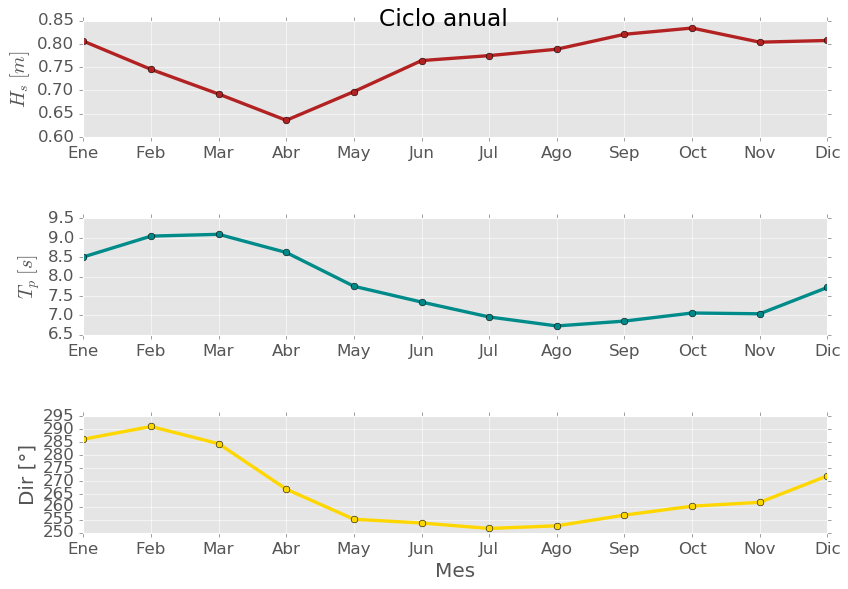

In [138]:
col=["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.7)
plt.suptitle("Ciclo anual",y=0.92,fontsize=21)

plt.subplot(311)
plt.plot(df1.columns,ciclo_anualHs,'-o',lw=3,c="firebrick")
# plt.title("Ciclo anual $H_{s}$")
plt.ylabel("$H_{s}\;[m]$")

plt.subplot(312)
plt.plot(df1.columns,ciclo_anualMWP,'-o',lw=3,c="darkcyan")
plt.ylabel("$T_{p}\;[s]$")


plt.subplot(313)
plt.plot(df1.columns,ciclo_anualMWD,'-o',lw=3,c="gold")
plt.xlabel("Mes")
plt.ylabel("Dir [°]")
plt.savefig("Graficos\\Ciclo_anual.png",dpi=500,bbox_inches="tight",pad_inches=0)

# Variación interanual

In [130]:
años_swh=test_data2.groupby(['Año'])['SWH']
años_mwp=test_data2.groupby(['Año'])['MWP']
años_mwd=test_data2.groupby(['Año'])['MWD']

def medias(serie):
    media_anual=[]
    for x,item in serie:
       prom=item.mean()
       media_anual.append(prom)
    return media_anual

medias_anuales_swh,medias_anuales_mwp,medias_anuales_mwd=medias(años_swh),medias(años_mwp),medias(años_mwd)

In [132]:
indices=[int(i) for i in range (1979,2019,1)]
var_anual_swh=pd.Series(medias_anuales_swh,index=indices)
var_anual_mwp=pd.Series(medias_anuales_mwp,index=indices)
var_anual_mwd=pd.Series(medias_anuales_mwd,index=indices)

Text(0.5, 0, 'Año')

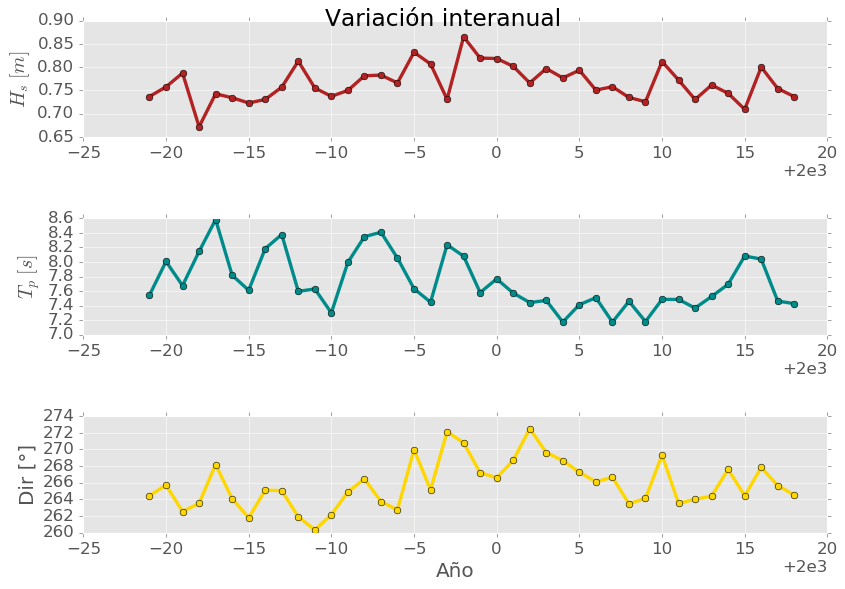

In [139]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.7)
plt.suptitle("Variación interanual",y=0.92,fontsize=21)

plt.subplot(311)
plt.plot(var_anual_swh,'-o',lw=3,c="firebrick")
# plt.xticks(indices)
# plt.title("Ciclo anual $H_{s}$")
plt.ylabel("$H_{s}\;[m]$")

plt.subplot(312)
plt.plot(var_anual_mwp,'-o',lw=3,c="darkcyan")
# plt.xticks(indices)
# plt.title("Ciclo anual $T_{p}$")
plt.ylabel("$T_{p}\;[s]$")


plt.subplot(313)
plt.plot(var_anual_mwd,'-o',lw=3,c="gold")
# plt.xticks(indices)
# plt.title("Ciclo anual Dir")
plt.ylabel("Dir [°]")
plt.xlabel("Año")
plt.savefig("Graficos\\Variacion_interanual.png",dpi=500,bbox_inches="tight",pad_inches=0)

# Rosa de oleaje

In [140]:
len(SWH)

350640

In [189]:
plt.style.use("ggplot")
from windrose import WindroseAxes
import matplotlib.cm as cm
# ws = np.random.random(500) * 6
# wd = np.random.random(500) * 360

MWD_nautico=[np.mod(-90-i,360) for i in MWD]

<Figure size 640x640 with 0 Axes>

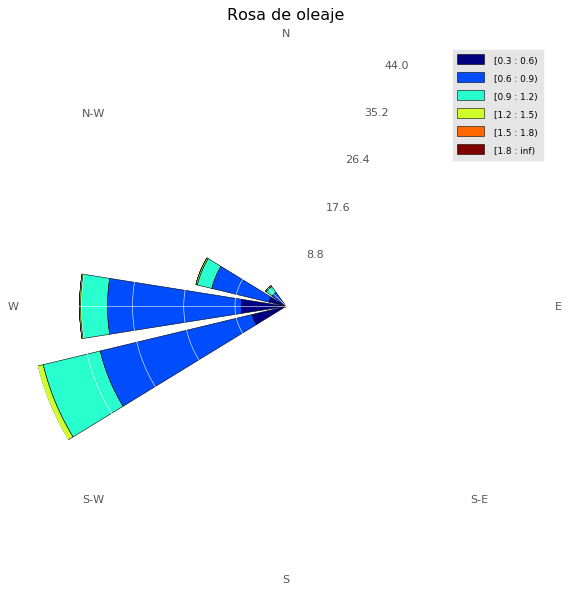

In [190]:
plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(MWD,SWH,normed=True, opening=0.8, edgecolor='black')
ax.set_legend(loc="upper right")
ax.set_title("Rosa de oleaje")
plt.savefig("Graficos\\rosa_oleaje.png",dpi=500,bbox_inches="tight",pad_inches=0)

In [178]:
# ax.bar(w, ws, normed=True, nsector=16)
table = ax._info['table']
direction = ax._info['dir']
bins=ax._info['bins']

wd_freq = np.sum(table, axis=0)

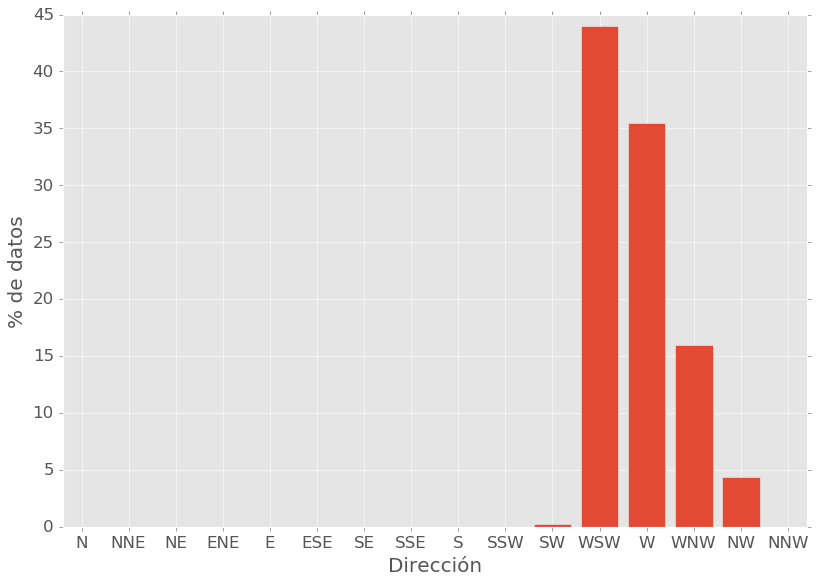

In [218]:
plt.bar(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'], wd_freq, align='center')
plt.xlabel("Dirección")
plt.ylabel("% de datos")
plt.savefig("Graficos\\histograma direccional.png",dpi=500,bbox_inches="tight",pad_inches=0)

# Probabilidad conjunta

In [214]:
# MWD_filter=[]
# SWH_filter=[]
# for i,j in zip(MWD,SWH):
#     if i not in MWD_filter:
#         MWD_filter.append(i)
#     if j not in SWH_filter:
#         SWH_filter.append(j)       

In [ ]:
# e = espacio_muestral = [1, 2, 3, 4, 5, 6]
# n = len(e)  # total de la muestra

# # probabilidad de A
# a = [i for i in e if i % 2 is not 0]
# pa = len(a) / float(n)

# # probabilidad de B
# b = [i for i in e if i % 2 is 0]
# pb = len(b) / float(n)

# # probabilidad de la intersección de sucesos
# pi = pa * pb

## Histogramas absolutos de Tp y Hs

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x0000016C9C36DEF0>>

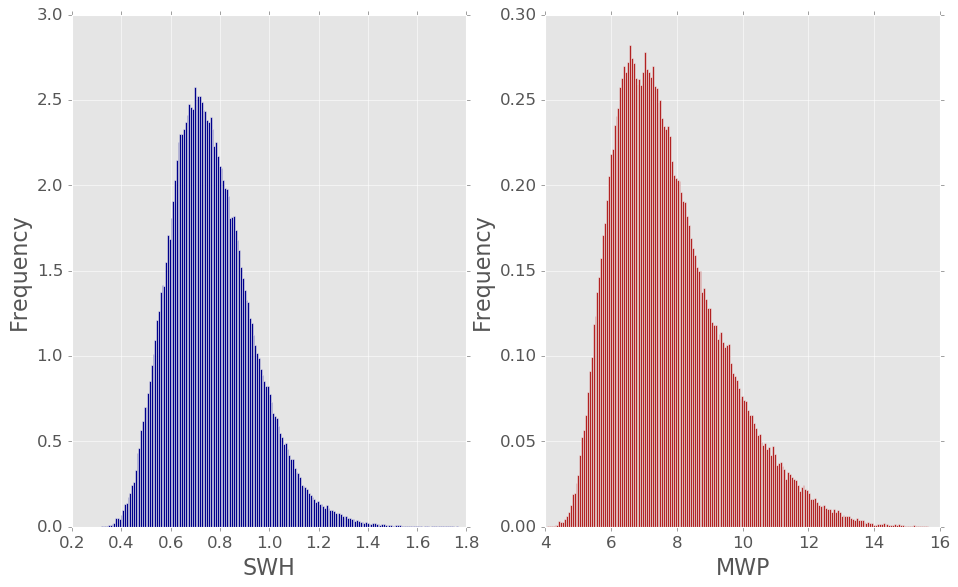

In [242]:
fig,axs = plt.subplots(1,2,figsize=(14,8))
ax=axs[0]
n, bins, patches = ax.hist(SWH, bins=200, normed=1, cumulative=0,color="darkblue")
ax.set_xlabel('SWH', size=20)
ax.set_ylabel('Frequencia', size=20)
ax.legend

ax1=axs[1]
n2, bins2, patches2 = ax1.hist(MWP, bins=200, normed=1, cumulative=0,color="firebrick")
ax1.set_xlabel('MWP', size=20)
ax1.set_ylabel('Frequencia', size=20)
ax1.legend

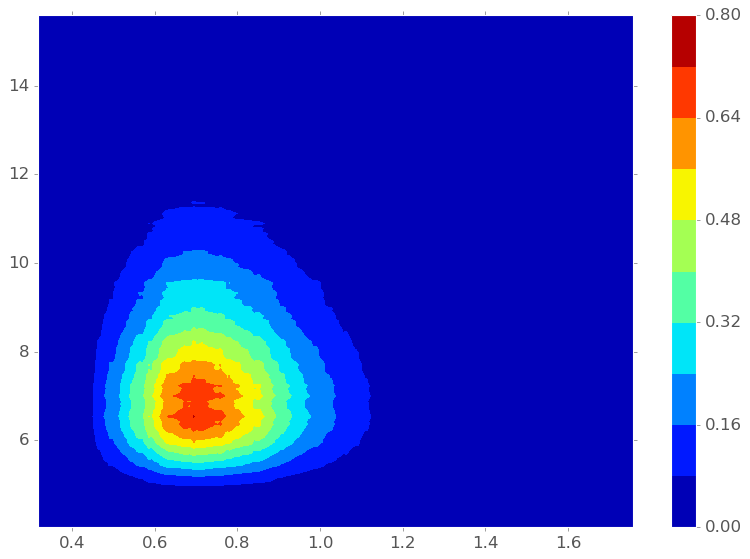

In [239]:
H=bins[:-1]
T=bins2[:-1]

values_H=n
values_T=n2

X,Y=np.meshgrid(H,T)

W,Z=np.meshgrid(values_H,values_T)
P_conjunta=W*Z

plt.contourf(X,Y,P_conjunta,levels=10)
plt.colorbar()

## Histogramas relativos de Tp y Hs

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x0000016C9F1DB940>>

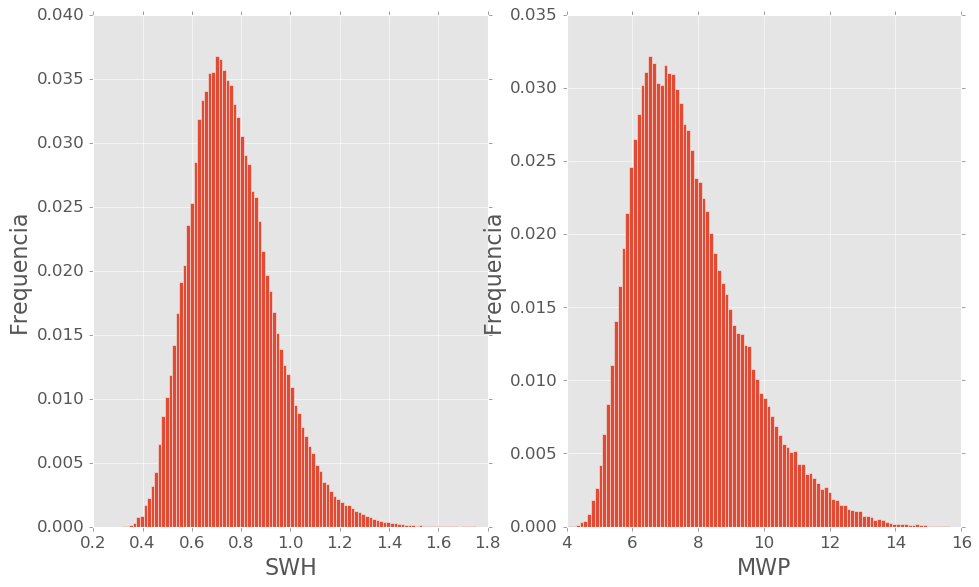

In [253]:
# assuming that mydata is an numpy array
SWH=np.array(SWH)
MWP=np.array(MWP)

fig,axs = plt.subplots(1,2,figsize=(14,8))
ax=axs[0]
n_rel, bins_rel, patches = ax.hist(SWH, bins=100,weights=np.zeros_like(SWH) + 1. / SWH.size)
ax.set_xlabel('SWH', size=20)
ax.set_ylabel('Frequencia', size=20)
ax.legend

ax1=axs[1]
n_rel2, bins_rel2, patches2 = ax1.hist(MWP, bins=100,weights=np.zeros_like(MWP) + 1. / MWP.size)
ax1.set_xlabel('MWP', size=20)
ax1.set_ylabel('Frequencia', size=20)
ax1.legend
 # this will give you fractions

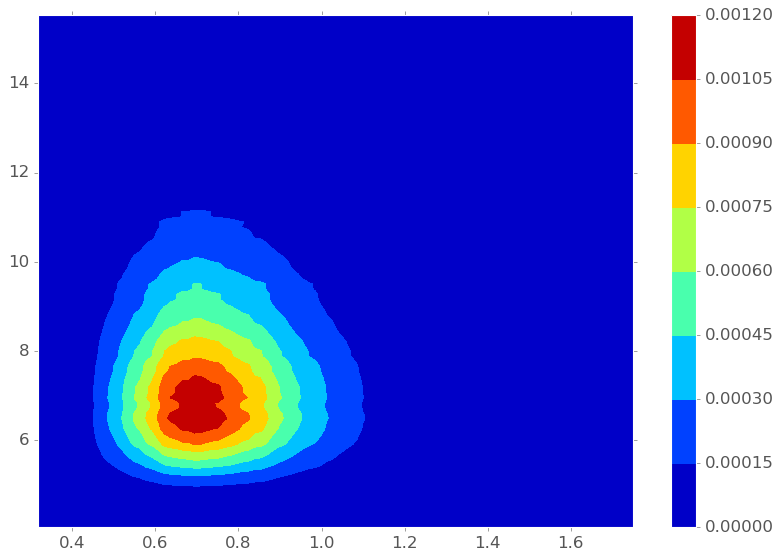

In [254]:
H=bins_rel[:-1]
T=bins_rel2[:-1]

values_H=n_rel
values_T=n_rel2

X,Y=np.meshgrid(H,T)

W,Z=np.meshgrid(values_H,values_T)
P_conjunta_rel=W*Z

plt.contourf(X,Y,P_conjunta_rel,levels=10)
plt.colorbar()